In [45]:
import pandas as pd
from collections import defaultdict
import numpy as np
import re

In [2]:
df = pd.read_csv('processed_tweets.csv')

# Building inverted index 

In [3]:
def extract_tweet_vocabulary(tweet, docId):
    return {term: docId for term in tweet.split(' ')}   

In [4]:
def merge_dicts(dicts):
    vocab = defaultdict(list)
    for dic in dicts:
        for term in dic:
            vocab[term].append(dic[term])
    return dict(vocab)

In [5]:
tweets_dicts=map(extract_tweet_vocabulary, df['Tweet'], df['DocID'])
vocabulary = merge_dicts(tweets_dicts)


In [6]:
print(len(vocabulary.keys()))

10671


In [7]:
i=0
for key, value in vocabulary.items():
    print(key, ' : ', value)
    i+=1
    if i>3:
        break

keep  :  ['doc_1', 'doc_86', 'doc_95', 'doc_228', 'doc_413', 'doc_433', 'doc_446', 'doc_467', 'doc_484', 'doc_499', 'doc_563', 'doc_653', 'doc_759', 'doc_762', 'doc_786', 'doc_848', 'doc_970', 'doc_998', 'doc_1102', 'doc_1135', 'doc_1320', 'doc_1442', 'doc_1626', 'doc_1634', 'doc_1644', 'doc_1651', 'doc_1812', 'doc_1817', 'doc_1893', 'doc_1944', 'doc_2045', 'doc_2046', 'doc_2096', 'doc_2114', 'doc_2235', 'doc_2270', 'doc_2290', 'doc_2299', 'doc_2326', 'doc_2384', 'doc_2495', 'doc_2522', 'doc_2529', 'doc_2577', 'doc_2599', 'doc_2677', 'doc_2689', 'doc_2776', 'doc_2806', 'doc_2925', 'doc_2936', 'doc_2940', 'doc_2959', 'doc_2975', 'doc_2980', 'doc_2983', 'doc_2998', 'doc_3036', 'doc_3083', 'doc_3093', 'doc_3097', 'doc_3175', 'doc_3205', 'doc_3222', 'doc_3355', 'doc_3364', 'doc_3377', 'doc_3442', 'doc_3506', 'doc_3561', 'doc_3711', 'doc_3716', 'doc_3769', 'doc_3830', 'doc_3843', 'doc_3904', 'doc_3922', 'doc_3955', 'doc_3969', 'doc_3994', 'doc_3996']
spin  :  ['doc_1', 'doc_3262']
u  :  ['d

## Propose test queries

Define five queries that will be used to evaluate your search
engine (e.g., “covid pandemic”, “covid vaccine”)
HINT: How to choose the queries? The selection of the queries is up to you but it’s
suggested to select terms based on the popularity (keywords ranked by term
frequencies or by TF-IDF, etc...).

In [10]:
print(df.head())

   Unnamed: 0  DocID                                              Tweet  \
0           0  doc_1       keep spin u 7 pmgo away alreadi hurricaneian   
1           1  doc_2  heart go affect hurricaneian wish everyon road...   
2           2  doc_3    kissimme neighborhood michigan ave hurricaneian   
3           3  doc_4  one tree backyard scare poltergeist tree storm...   
4           4  doc_5  ashleyruizwx stephan89441722 lilmizzheidi mrsn...   

      Username                            Date                  Hashtags  \
0     suzjdean  Fri Sep 30 18:39:08 +0000 2022          ['HurricaneIan']   
1         lytx  Fri Sep 30 18:39:01 +0000 2022          ['HurricaneIan']   
2   CHeathWFTV  Fri Sep 30 18:38:58 +0000 2022          ['HurricaneIan']   
3  spiralgypsy  Fri Sep 30 18:38:57 +0000 2022  ['scwx', 'HurricaneIan']   
4   Blondie610  Fri Sep 30 18:38:53 +0000 2022          ['HurricaneIan']   

   Likes  Retweets                                                Url  
0      0         0  

In [12]:
print(df[df.DocID == 'doc_1'].Tweet[0].split())

['keep', 'spin', 'u', '7', 'pmgo', 'away', 'alreadi', 'hurricaneian']


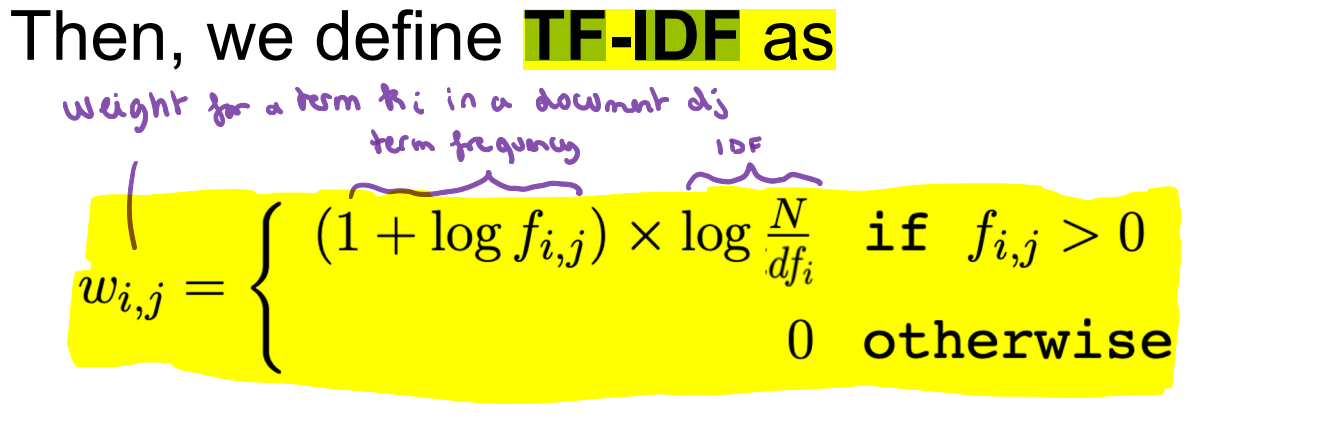

In [38]:
def build_TF_IDF(df, vocabulary):
    terms = vocabulary.keys()
    docs = df.DocID
    N = len(docs)
    tf_idf = dict()
    for term in terms:
        tf_idf[term]={}
        for doc in vocabulary[term]:
            tf = df[df.DocID == doc].Tweet.iloc[0].split().count(term)
            if tf>0:
                df_i = len(vocabulary[term])
                tf_idf[term][doc] = (1+np.log(tf))*np.log(N/df_i)
            else:
                tf_idf[term][doc] = 0
    return tf_idf
        
    

In [25]:
print(vocabulary['keep'])

['doc_1', 'doc_86', 'doc_95', 'doc_228', 'doc_413', 'doc_433', 'doc_446', 'doc_467', 'doc_484', 'doc_499', 'doc_563', 'doc_653', 'doc_759', 'doc_762', 'doc_786', 'doc_848', 'doc_970', 'doc_998', 'doc_1102', 'doc_1135', 'doc_1320', 'doc_1442', 'doc_1626', 'doc_1634', 'doc_1644', 'doc_1651', 'doc_1812', 'doc_1817', 'doc_1893', 'doc_1944', 'doc_2045', 'doc_2046', 'doc_2096', 'doc_2114', 'doc_2235', 'doc_2270', 'doc_2290', 'doc_2299', 'doc_2326', 'doc_2384', 'doc_2495', 'doc_2522', 'doc_2529', 'doc_2577', 'doc_2599', 'doc_2677', 'doc_2689', 'doc_2776', 'doc_2806', 'doc_2925', 'doc_2936', 'doc_2940', 'doc_2959', 'doc_2975', 'doc_2980', 'doc_2983', 'doc_2998', 'doc_3036', 'doc_3083', 'doc_3093', 'doc_3097', 'doc_3175', 'doc_3205', 'doc_3222', 'doc_3355', 'doc_3364', 'doc_3377', 'doc_3442', 'doc_3506', 'doc_3561', 'doc_3711', 'doc_3716', 'doc_3769', 'doc_3830', 'doc_3843', 'doc_3904', 'doc_3922', 'doc_3955', 'doc_3969', 'doc_3994', 'doc_3996']


In [37]:
ordered_terms = pd.DataFrame.from_dict(tf_idf).sum().sort_values(ascending=False)

In [40]:
print(ordered_terms[0:21])

florida       1431.550905
hurrican      1383.119941
ian           1353.611241
amp            981.807076
help           962.631899
storm          878.850881
flood          794.754256
power          779.361058
carolina       763.872311
go             721.559499
south          719.974992
peopl          717.540505
make           703.880429
wind           697.074977
landfal        692.122525
damag          673.161406
impact         642.389081
safe           641.876965
get            641.067084
u              637.627143
charleston     628.597360
dtype: float64


From these results whe have concluded that some queries could be:

Q1="florida hurrican"

Q2="help florida"

Q3="hurrican ian"

Q4="storm impact"

Q5="wind damage"

In [41]:
tf_idf = build_TF_IDF(df, vocabulary)

## Rank your results

In [42]:
def build_terms(line):
    """
    Preprocess the tweet content removing stop words, contractionas and urls
    lemmatizing and stemming words to keep a single word for each family of words
    transforming in lowercase, removing special characters [#, @, .] 
    (since it is included in another column on the dataframe)
    
    return tokenized tweet (list of words after applying the previous steps).
    
    Argument:
    line -- string (tweet) to be preprocessed
    
    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """
    ## START CODE
    line = line.lower() ##Transform in lowercase
    line = re.sub(r"[^A-Za-z 0-9 ']+", '', line) # remove emojis and any other special character
    stop_words = set(stopwords.words("english")) # removing stopwords
    line = ' '.join([contractions.fix(x) for x in line.split(' ')]) # expaning verb abreviations: i'll -> i will 
    line = re.sub("'", '', line) 
    line = line.split(' ')
    line = [x for x in line if x and x not in stop_words]
    line = filter(lambda x:x[0:5]!='https', line) # removing links
    line = [x for x in line]
    ps = PorterStemmer() 
    lemmatizer = WordNetLemmatizer() 
    line = [lemmatizer.lemmatize(x) for x in line] # keeping the singular form of each noun: feet --> foot
    line = [ps.stem(x) for x in line] # keeping the root of each family of words: dancer --> danc
    
    ## END CODE
    return ' '.join(line)

In [68]:
def rank(query, tf_idf, vocabulary, df):
    terms_query = query.split()
    tf_idf_q = {}
    docs = df.DocID
    N = len(docs)
    tf_idf_docs= dict((doc, []) for doc in docs)
    for term in terms_query:
        df_i = len(vocabulary[term])
        tf_idf_q[term]=(1+np.log(terms_query.count(term)))*np.log(N/df_i)
        for doc in docs:
            if doc in tf_idf[term].keys():
                tf_idf_docs[doc].append(tf_idf[term][doc])
            else:
                tf_idf_docs[doc].append(0)
    score_docs = dict()
    vector_q = list(tf_idf_q.values())
    length_q = np.linalg.norm(vector_q)
    for doc in docs:
        length_doc = np.linalg.norm(tf_idf_docs[doc])
        score_docs[doc]= np.dot(vector_q, tf_idf_docs[doc])/(length_doc*length_q)
    return sorted(score_docs.items(), key=lambda x: x[1], reverse=True)

In [69]:
Q1 = "florida hurrican"
ranked_docs_Q1 = rank(Q1, tf_idf, vocabulary, df)
print("Top 10 documents for query 1:", Q1+":")
print(ranked_docs_Q1[0:11])

Top 10 documents for query 1: florida hurrican:
[('doc_1', nan), ('doc_2', nan), ('doc_3', nan), ('doc_4', nan), ('doc_5', nan), ('doc_7', nan), ('doc_8', 2.264642006705599), ('doc_6', 1.6398971199188093), ('doc_9', nan), ('doc_10', 1.5618389336348215), ('doc_11', nan)]


C:\Users\Josep Alet\AppData\Local\Temp\ipykernel_23148\3566346279.py:20: RuntimeWarning: invalid value encountered in double_scalars
  score_docs[doc]= np.dot(vector_q, tf_idf_docs[doc])/length_doc


In [62]:
ranked_docs_Q1[-1]

('doc_4000', 0.0)

In [61]:
print(df[df.DocID == 'doc_733'].Tweet.iloc[0])

experi hurrican check hurricaneian bless hurrican florida


In [64]:
print(df[df.DocID == 'doc_640'].Tweet.iloc[0])

hurrican ian hurricaneian


In [65]:
Q2 = "help florida"
ranked_docs_Q2 = rank(Q2, tf_idf, vocabulary, df)
print("Top 10 documents for query 1:", Q2+":")
print(ranked_docs_Q2[0:11])

Top 10 documents for query 1: help florida:
[('doc_477', 1.855204803743713), ('doc_947', 1.3914036028077847), ('doc_3172', 1.3914036028077847), ('doc_887', 1.143565037978385), ('doc_321', 1.1131228822462278), ('doc_1430', 1.1131228822462278), ('doc_1458', 1.1131228822462278), ('doc_3956', 1.1131228822462278), ('doc_2964', 1.0784313820979419), ('doc_1679', 1.047044927606645), ('doc_1993', 1.0006194082310869)]


In [ ]:
print(df[df.DocID == 'doc_733'].Tweet.iloc[0])

# Evaluation